In [45]:


import numpy as np 
import pandas as pd



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [46]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [47]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [48]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [49]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [51]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

**CNN**

In [52]:

model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 71, 71, 64)        36928     
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 69, 69, 64)        36928     
_________________________________________________________________
dropout_20 (Dropout)         (None, 69, 69, 64)       

In [54]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=25, validation_split=0.1, batch_size=32)



Epoch 1/25
83/83 [==============================] - 4s 41ms/step - loss: 1.6451 - accuracy: 0.3012 - val_loss: 1.3638 - val_accuracy: 0.2891
Epoch 2/25
83/83 [==============================] - 3s 39ms/step - loss: 1.3011 - accuracy: 0.4011 - val_loss: 1.2746 - val_accuracy: 0.4014
Epoch 3/25
83/83 [==============================] - 3s 39ms/step - loss: 1.0757 - accuracy: 0.5414 - val_loss: 0.9292 - val_accuracy: 0.6020
Epoch 4/25
83/83 [==============================] - 3s 39ms/step - loss: 0.9340 - accuracy: 0.6031 - val_loss: 0.8399 - val_accuracy: 0.6497
Epoch 5/25
83/83 [==============================] - 3s 39ms/step - loss: 0.8230 - accuracy: 0.6508 - val_loss: 0.7760 - val_accuracy: 0.6497
Epoch 6/25
83/83 [==============================] - 3s 39ms/step - loss: 0.7242 - accuracy: 0.7037 - val_loss: 0.7829 - val_accuracy: 0.6224
Epoch 7/25
83/83 [==============================] - 3s 39ms/step - loss: 0.6789 - accuracy: 0.7196 - val_loss: 0.5372 - val_accuracy: 0.7993
Epoch 8/25
83

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

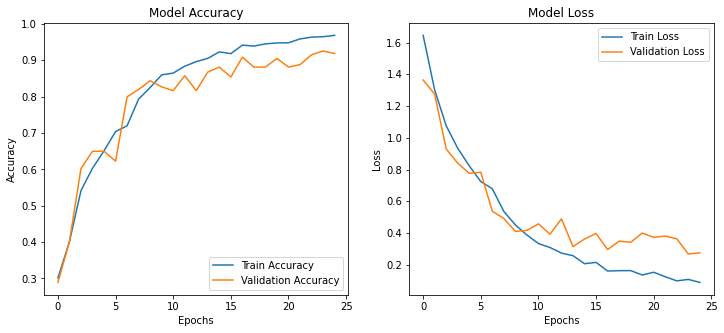

In [56]:
# Function to plot accuracy and loss
def plot_training_history(history):
    # Summarize history for accuracy
    plt.figure(figsize=(12, 5))
    
    # Plot for accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Plot for loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.show()

# Call the plot function
plot_training_history(history)


In [57]:

test_loss, test_accuracy = model.evaluate(X_test, y_test)


print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


11/11 [==============================] - 0s 10ms/step - loss: 0.3508 - accuracy: 0.9205
Test Loss: 0.35075730085372925
Test Accuracy: 0.9204893112182617


**DEEPLAB**

In [58]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Input, UpSampling2D, concatenate, BatchNormalization, Activation
from tensorflow.keras.models import Model

def atrous_block(input_tensor, filters, dilation_rate):
    x = Conv2D(filters, (3, 3), padding='same', dilation_rate=dilation_rate)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def build_deeplab(input_shape=(150, 150, 3), num_classes=4):
    inputs = Input(input_shape)

  
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    pool1 = Dropout(0.3)(pool1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    pool2 = Dropout(0.3)(pool2)

   
    atrous1 = atrous_block(pool2, 128, dilation_rate=2)
    atrous2 = atrous_block(atrous1, 128, dilation_rate=4)
    atrous3 = atrous_block(atrous2, 128, dilation_rate=8)
    

    combined = concatenate([atrous1, atrous2, atrous3], axis=3)

   
    up = UpSampling2D(size=(4, 4))(combined)
    up = Conv2D(64, (3, 3), activation='relu', padding='same')(up)
    
  
    output = Conv2D(num_classes, (1, 1), activation='softmax')(up)

    model = Model(inputs, output)
    return model


deeplab_model = build_deeplab(input_shape=(150, 150, 3), num_classes=4)
deeplab_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_56 (Conv2D)              (None, 150, 150, 32) 896         input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_57 (Conv2D)              (None, 150, 150, 64) 18496       conv2d_56[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_21 (MaxPooling2D) (None, 75, 75, 64)   0           conv2d_57[0][0]                  
____________________________________________________________________________________________

In [59]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 4s 42ms/step - loss: 0.1002 - accuracy: 0.9648 - val_loss: 0.3902 - val_accuracy: 0.8810
Epoch 2/20
83/83 [==============================] - 3s 39ms/step - loss: 0.0858 - accuracy: 0.9712 - val_loss: 0.4817 - val_accuracy: 0.8639
Epoch 3/20
83/83 [==============================] - 3s 39ms/step - loss: 0.1229 - accuracy: 0.9607 - val_loss: 0.4692 - val_accuracy: 0.8707
Epoch 4/20
83/83 [==============================] - 3s 39ms/step - loss: 0.0821 - accuracy: 0.9731 - val_loss: 0.4094 - val_accuracy: 0.9184
Epoch 5/20
83/83 [==============================] - 3s 39ms/step - loss: 0.0864 - accuracy: 0.9697 - val_loss: 0.3516 - val_accuracy: 0.8741
Epoch 6/20
83/83 [==============================] - 3s 39ms/step - loss: 0.0865 - accuracy: 0.9735 - val_loss: 0.3599 - val_accuracy: 0.9048
Epoch 7/20
83/83 [==============================] - 3s 39ms/step - loss: 0.0748 - accuracy: 0.9754 - val_loss: 0.3798 - val_accuracy: 0.9048
Epoch 8/20
83

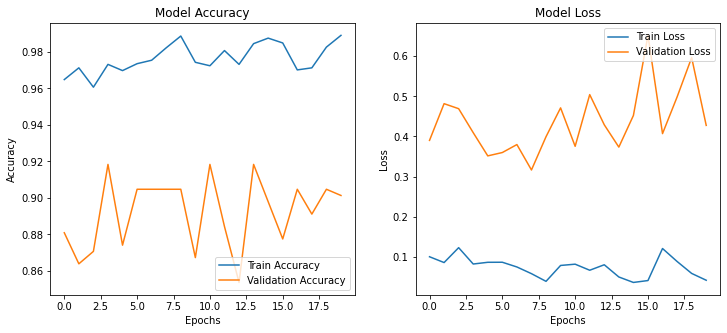

In [61]:

def plot_training_history(history):
    
    plt.figure(figsize=(12, 5))
    
    # Plot for accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')


    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.show()

plot_training_history(history)


**FCN**

In [72]:
def fcn_model(input_shape=(150, 150, 3), num_classes=4):
    inputs = Input(input_shape)

    # Convolutional Layers
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Add more convolutional layers if needed

    # Fully Convolutional Layers
    x = Conv2D(num_classes, (1, 1), activation='softmax')(x)
    
    # Upsampling
    x = UpSampling2D(size=(32, 32))(x)

    model = Model(inputs, x)
    return model

fcn = fcn_model(input_shape=(150, 150, 3), num_classes=4)
fcn.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 37, 37, 128)       0   

In [75]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
74/74 [==============================] - 5s 51ms/step - loss: 0.0600 - accuracy: 0.9838 - val_loss: 0.2079 - val_accuracy: 0.9660
Epoch 2/20
74/74 [==============================] - 3s 40ms/step - loss: 0.0403 - accuracy: 0.9872 - val_loss: 0.3916 - val_accuracy: 0.9371
Epoch 3/20
74/74 [==============================] - 3s 41ms/step - loss: 0.0526 - accuracy: 0.9851 - val_loss: 0.2128 - val_accuracy: 0.9660
Epoch 4/20
74/74 [==============================] - 3s 40ms/step - loss: 0.0554 - accuracy: 0.9847 - val_loss: 0.3171 - val_accuracy: 0.9388
Epoch 5/20
74/74 [==============================] - 3s 40ms/step - loss: 0.0293 - accuracy: 0.9919 - val_loss: 0.2676 - val_accuracy: 0.9439
Epoch 6/20
74/74 [==============================] - 3s 40ms/step - loss: 0.0291 - accuracy: 0.9898 - val_loss: 0.3029 - val_accuracy: 0.9371
Epoch 7/20
74/74 [==============================] - 3s 40ms/step - loss: 0.0268 - accuracy: 0.9906 - val_loss: 0.2800 - val_accuracy: 0.9694
Epoch 8/20
74

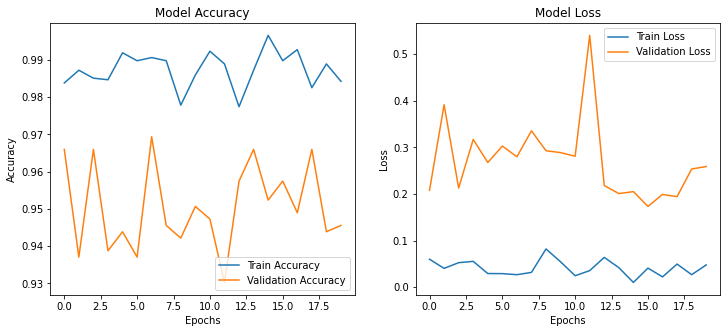

In [76]:

def plot_training_history(history):
    
    plt.figure(figsize=(12, 5))
    
    # Plot for accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')


    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.show()

plot_training_history(history)


**Segnet**

In [77]:
def segnet_model(input_shape=(150, 150, 3), num_classes=4):
    inputs = Input(input_shape)

    # Encoder
    conv1 = Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    conv1 = Conv2D(64, (3, 3), padding='same', activation='relu')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, (3, 3), padding='same', activation='relu')(pool1)
    conv2 = Conv2D(128, (3, 3), padding='same', activation='relu')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, (3, 3), padding='same', activation='relu')(pool2)
    conv3 = Conv2D(256, (3, 3), padding='same', activation='relu')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Decoder
    up1 = UpSampling2D(size=(2, 2))(pool3)
    conv4 = Conv2D(128, (3, 3), padding='same', activation='relu')(up1)
    conv4 = Conv2D(128, (3, 3), padding='same', activation='relu')(conv4)

    up2 = UpSampling2D(size=(2, 2))(conv4)
    conv5 = Conv2D(64, (3, 3), padding='same', activation='relu')(up2)
    conv5 = Conv2D(64, (3, 3), padding='same', activation='relu')(conv5)

    up3 = UpSampling2D(size=(2, 2))(conv5)
    outputs = Conv2D(num_classes, (1, 1), activation='softmax')(up3)

    model = Model(inputs, outputs)
    return model

segnet = segnet_model(input_shape=(150, 150, 3), num_classes=4)
segnet.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 37, 37, 128)       0   

In [78]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=40,validation_split=0.2)

Epoch 1/40
74/74 [==============================] - 4s 43ms/step - loss: 0.0379 - accuracy: 0.9877 - val_loss: 0.2781 - val_accuracy: 0.9592
Epoch 2/40
74/74 [==============================] - 3s 40ms/step - loss: 0.0375 - accuracy: 0.9923 - val_loss: 0.2784 - val_accuracy: 0.9456
Epoch 3/40
74/74 [==============================] - 3s 40ms/step - loss: 0.0801 - accuracy: 0.9779 - val_loss: 0.2149 - val_accuracy: 0.9541
Epoch 4/40
74/74 [==============================] - 3s 40ms/step - loss: 0.0537 - accuracy: 0.9834 - val_loss: 0.2492 - val_accuracy: 0.9592
Epoch 5/40
74/74 [==============================] - 3s 40ms/step - loss: 0.0394 - accuracy: 0.9911 - val_loss: 0.2574 - val_accuracy: 0.9473
Epoch 6/40
74/74 [==============================] - 3s 40ms/step - loss: 0.0459 - accuracy: 0.9881 - val_loss: 0.3846 - val_accuracy: 0.9371
Epoch 7/40
74/74 [==============================] - 3s 42ms/step - loss: 0.0452 - accuracy: 0.9855 - val_loss: 0.2737 - val_accuracy: 0.9541
Epoch 8/40
74

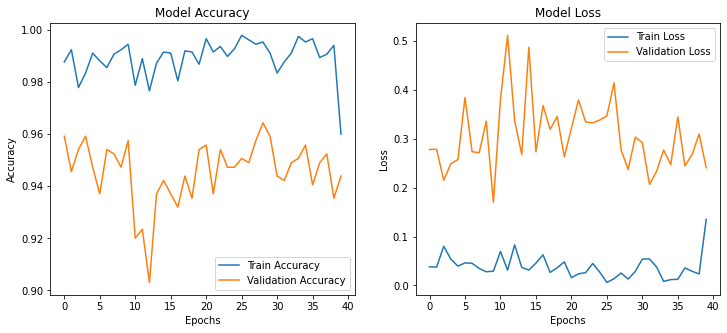

In [79]:

def plot_training_history(history):
    
    plt.figure(figsize=(12, 5))
    
    # Plot for accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')


    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.show()

plot_training_history(history)


In [80]:
img = cv2.imread('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (108).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [81]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

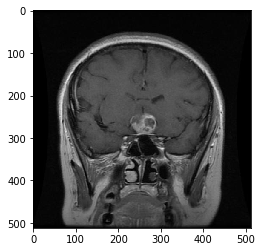

In [82]:
from tensorflow.keras.preprocessing import image
img = image.load_img('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (108).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [83]:
model.save('/kaggle/working/my_model.h5') 

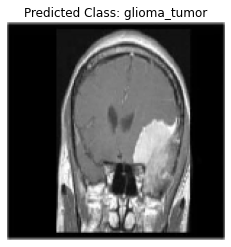

In [87]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


model = load_model('/kaggle/working/my_model.h5')


class_names = {
    0: 'glioma_tumor',
    1: 'meningioma_tumor',
    2: 'no_tumor',
    3: 'pituitary_tumor'
}


def predict_image(img_path):
  
    img = image.load_img(img_path, target_size=(150, 150)) 
    img_array = image.img_to_array(img) / 255.0 
    img_array = np.expand_dims(img_array, axis=0)  
    

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]  
    

    predicted_class_name = class_names[predicted_class]


    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {predicted_class_name}')
    plt.show()


uploaded_image_path = '/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(1).jpg' 


predict_image(uploaded_image_path)
